In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy

In [2]:
# open the file in read mode
filename = open(r'C:\Users\z003zh2j\Desktop\PLOT\eqn\e-ur.csv', 'r')
 
# creating dictreader object
file = csv.DictReader(filename)
t = []
u = []
r = []
 
# iterating over each row and append
# values to empty list       
for col in file:
    t.append((float(col['t']))/1e6)
    u.append((float(col['u']))/30)
    r.append((float(col['r']))/1e3)

In [2]:
# open the file in read mode
filename = open(r'C:\Users\z003zh2j\Desktop\PLOT\eqn\e-abr.csv', 'r')
 
# creating dictreader object
file = csv.DictReader(filename)
tt = []
a = []
b = []
rr = []
 
# iterating over each row and append
# values to empty list       
for col in file:
    tt.append((float(col['t']))/1e6)
    a.append((float(col['a']))/1e3)
    b.append((float(col['b']))/1e3)
    rr.append((float(col['r']))/1e3)

In [4]:
# open the file in read mode
filename = open(r'C:\Users\z003zh2j\Desktop\PLOT\eqn\e-cdr.csv', 'r')
 
# creating dictreader object
file = csv.DictReader(filename)
ttt = []
c = []
d = []
rrr = []
 
# iterating over each row and append
# values to empty list       
for col in file:
    ttt.append((float(col['t']))/1e6)
    c.append((float(col['c']))/1e3)
    d.append((float(col['d']))/1e3)
    rrr.append((float(col['r']))/1e3)

In [5]:
try:
  def pnej(seznam):
    indexy = []
    for i, hodnota in enumerate(seznam):
      if hodnota > 0.1: #0.2
        indexy.append(i)
    return indexy
  R = t[pnej(r)[0]]
  RR = tt[pnej(rr)[0]]
  RRR = ttt[pnej(rrr)[0]]

except IndexError:
  R, RR, RRR = 50,100,100

In [6]:
# R = r.index(max(r))
# R = R * 350e-6
# RR = rr.index(max(rr))
# RR = RR * 350e-6
# RRR = rrr.index(max(rrr))
# RRR = RRR * 350e-6

In [7]:
# n = 15  # the larger n is, the smoother curve will be
# B = [1.0 / n] * n
# A = 1

# # filt na odstranění šumu
# c = scipy.signal.lfilter(B, A, c)
# d = scipy.signal.lfilter(B, A, d)
# rrr = scipy.signal.lfilter(B, A, rrr)

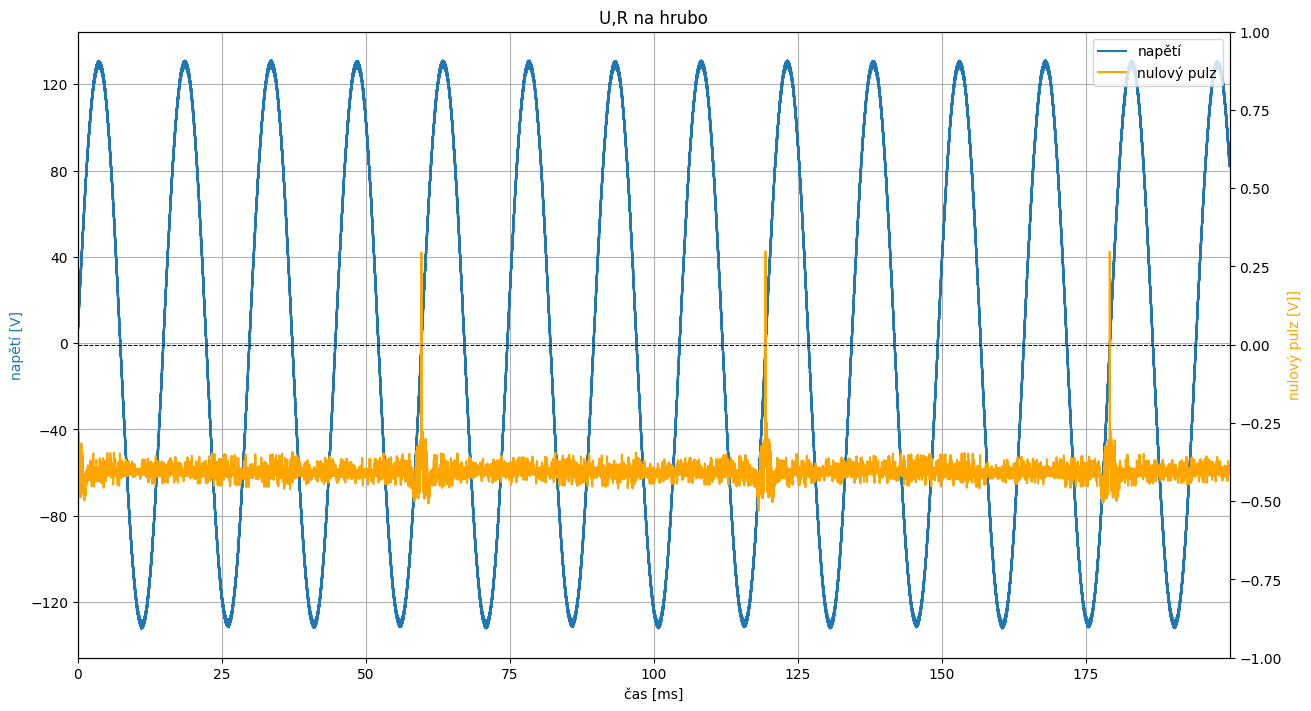

In [8]:
fig, host = plt.subplots(figsize=(13,7), layout='constrained')
ax2 = host.twinx()  
host.set_xlim(0, t[-1])
# host.set_ylim(-6200, 6200)
ax2.set_ylim(-1, 1)

host.set_xlabel("čas [ms]")
host.set_ylabel("napětí [V]")
ax2.set_ylabel("nulový pulz [V]]")

p1 = host.plot(t, u, label="napětí")
p2 = ax2.plot(t, r, label="nulový pulz", color='orange')

plt.hlines(0,0,t[-1],color = 'k', linestyles='--',lw = 0.75)
plt.title("U,R na hrubo")
host.legend(handles=p1+p2, loc='upper right')
host.set_yticks(np.arange(-120, 140, step=40))
host.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())
host.grid()
plt.show()

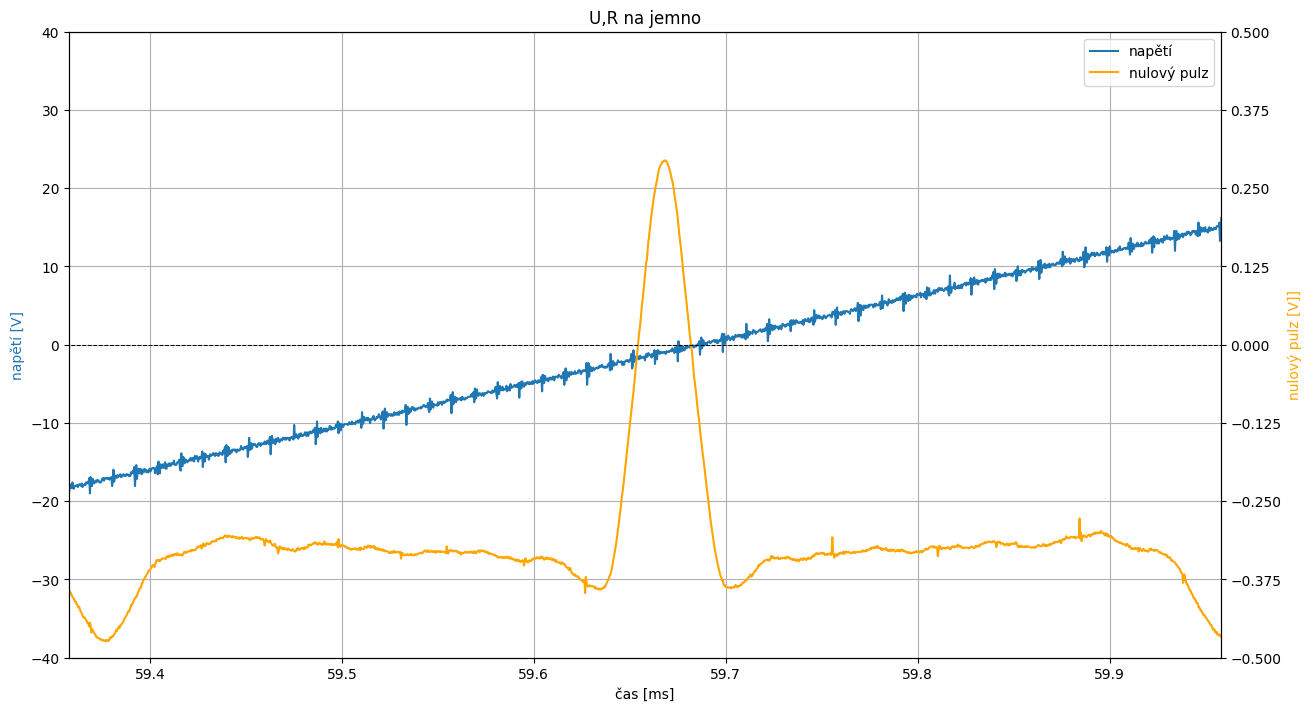

In [9]:
fig, host = plt.subplots(figsize=(13,7), layout='constrained')
ax2 = host.twinx()
    
host.set_xlim(R-0.3, R+0.3)
host.set_ylim(-40, 40)
ax2.set_ylim(-0.5, 0.5)

host.set_xlabel("čas [ms]")
host.set_ylabel("napětí [V]")
ax2.set_ylabel("nulový pulz [V]]")

p1 = host.plot(t, u, label="napětí")
p2 = ax2.plot(t, r, label="nulový pulz", color='orange')
ax2.set_yticks(np.arange(-0.5, 0.5+0.5/4, step=0.5/4))
plt.hlines(0,0,t[-1],color = 'k', linestyles='--',lw = 0.75)
plt.title("U,R na jemno")
host.legend(handles=p1+p2, loc='upper right')
host.set_yticks(np.arange(-40, 50, step=10))
host.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())
host.grid()
# plt.show()
plt.savefig("ur.png")

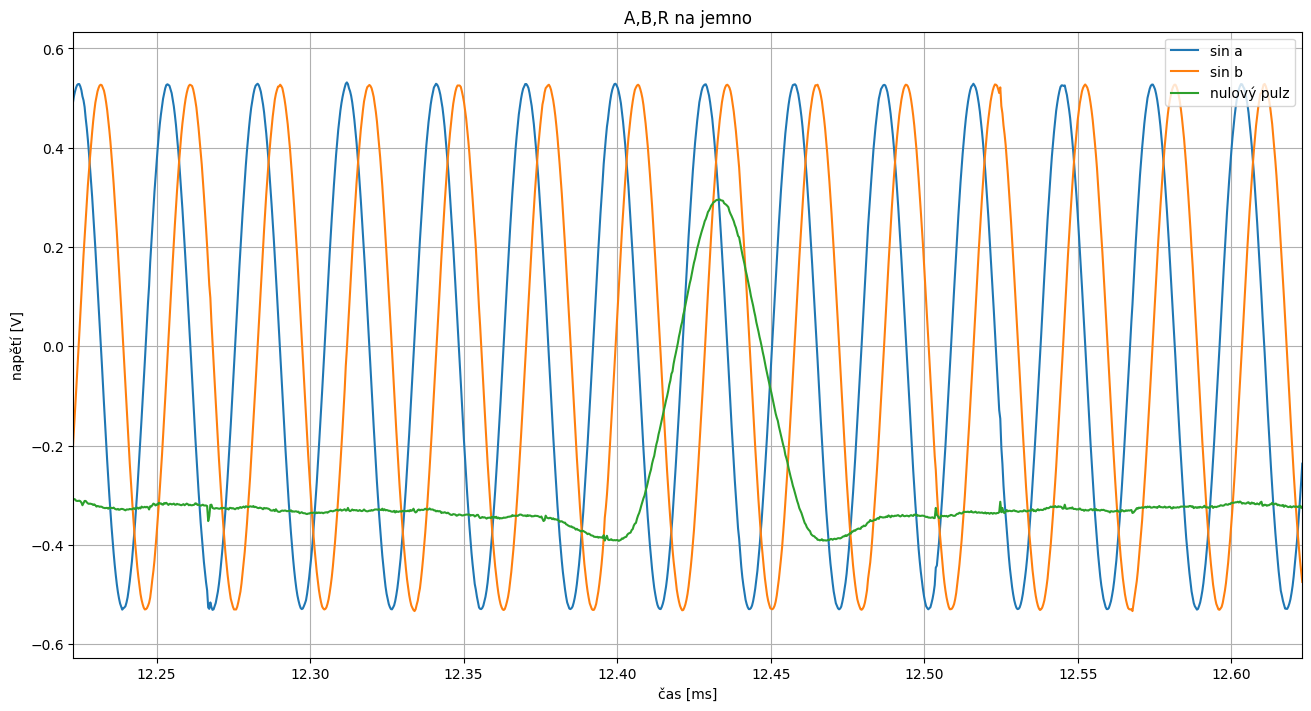

In [10]:
fig, host = plt.subplots(figsize=(13,7), layout='constrained')
plt.title("A,B,R na jemno")
p1 = plt.plot(tt,a, label="sin a")
p2 = plt.plot(tt,b, label="sin b")
p3 = plt.plot(tt,rr, label="nulový pulz")
plt.xlim(RR-0.2,RR+0.2)
host.set_xlabel("čas [ms]")
host.set_ylabel("napětí [V]")
host.legend(handles=p1+p2+p3, loc='upper right')
plt.grid()
# plt.show()
plt.savefig("abr.png")

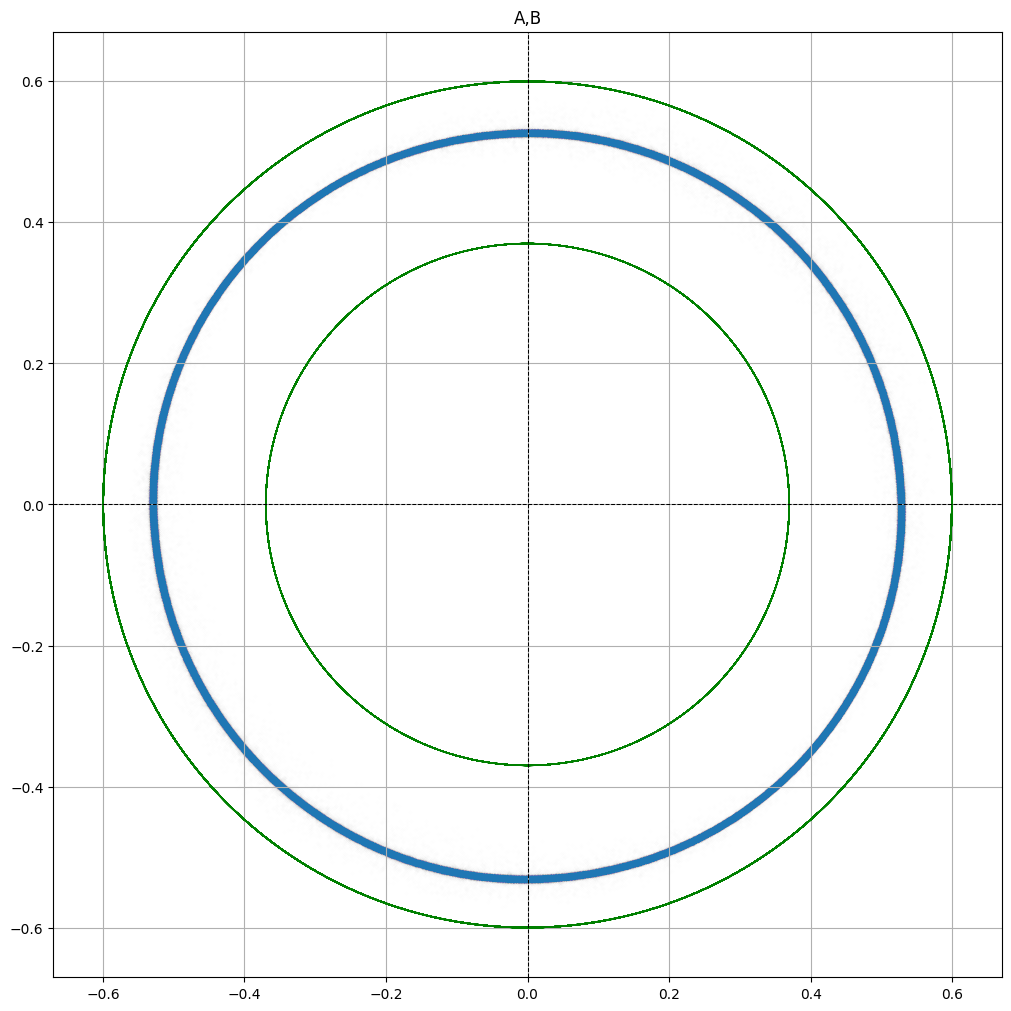

In [11]:
x = np.linspace(0,1000,10000)
y = 0.6 *np.sin(1*x+0)+0
yy = 0.6 *np.sin(1*x+np.pi/2)+0
w = 0.37 *np.sin(1*x+0)+0
ww = 0.37 *np.sin(1*x+np.pi/2)+0
fig = plt.subplots(figsize=(10,10), layout='constrained')
plt.title("A,B")
plt.plot(y,yy, lw = 0.75,color = 'g')
plt.plot(w,ww, lw = 0.75,color = 'g')
plt.scatter(a,b, linewidths= 0.1, marker=".", alpha=0.005)
plt.xlim(-0.67,0.67)
plt.ylim(-0.67,0.67)
plt.vlines(0,-0.67,0.67,color = 'k', linestyles='--',lw = 0.75)
plt.hlines(0,-0.67,0.67,color = 'k', linestyles='--',lw = 0.75)
plt.grid()
# plt.show()
plt.savefig("kola.png")

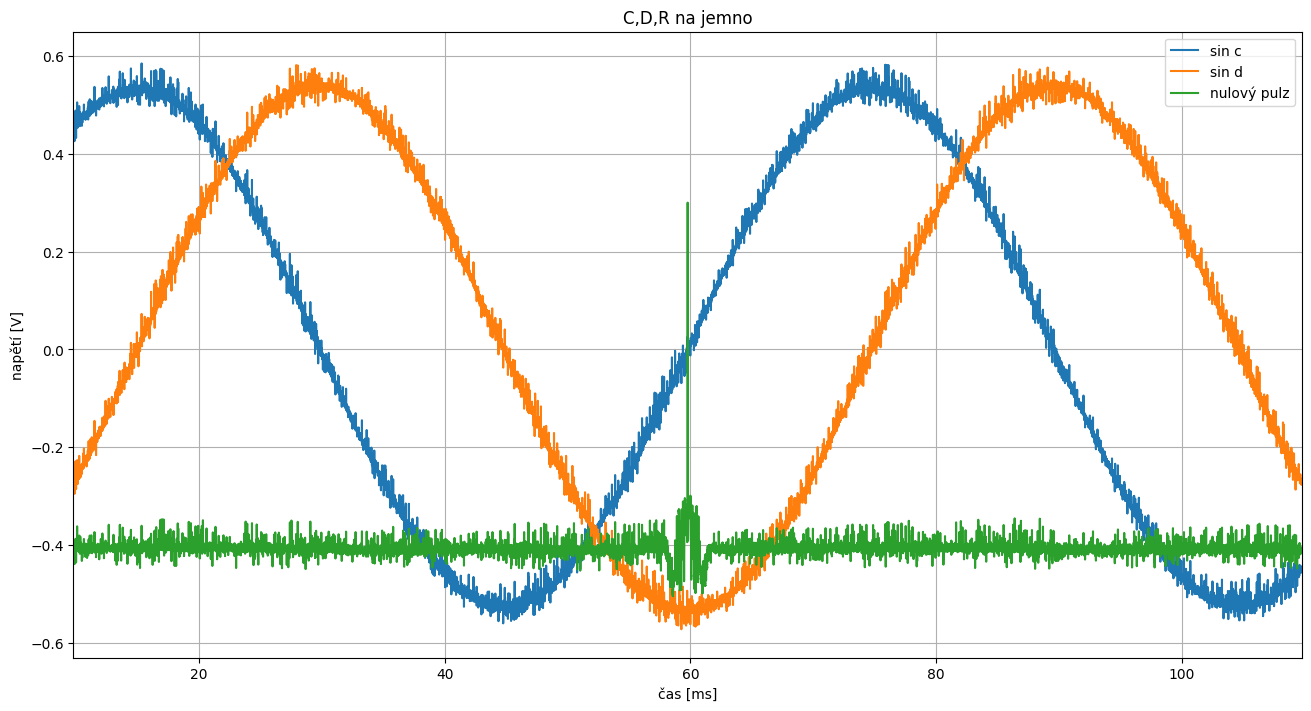

In [12]:
fig, host = plt.subplots(figsize=(13,7), layout='constrained')
plt.title("C,D,R na jemno")
p1 = plt.plot(ttt,c, label="sin c")
p2 = plt.plot(ttt,d, label="sin d")
p3 = plt.plot(ttt,rrr, label="nulový pulz")
host.set_xlabel("čas [ms]")
host.set_ylabel("napětí [V]")
host.legend(handles=p1+p2+p3, loc='upper right')
plt.xlim(RRR-50,RRR+50)
plt.grid()
# plt.show()
plt.savefig("cdr.png")

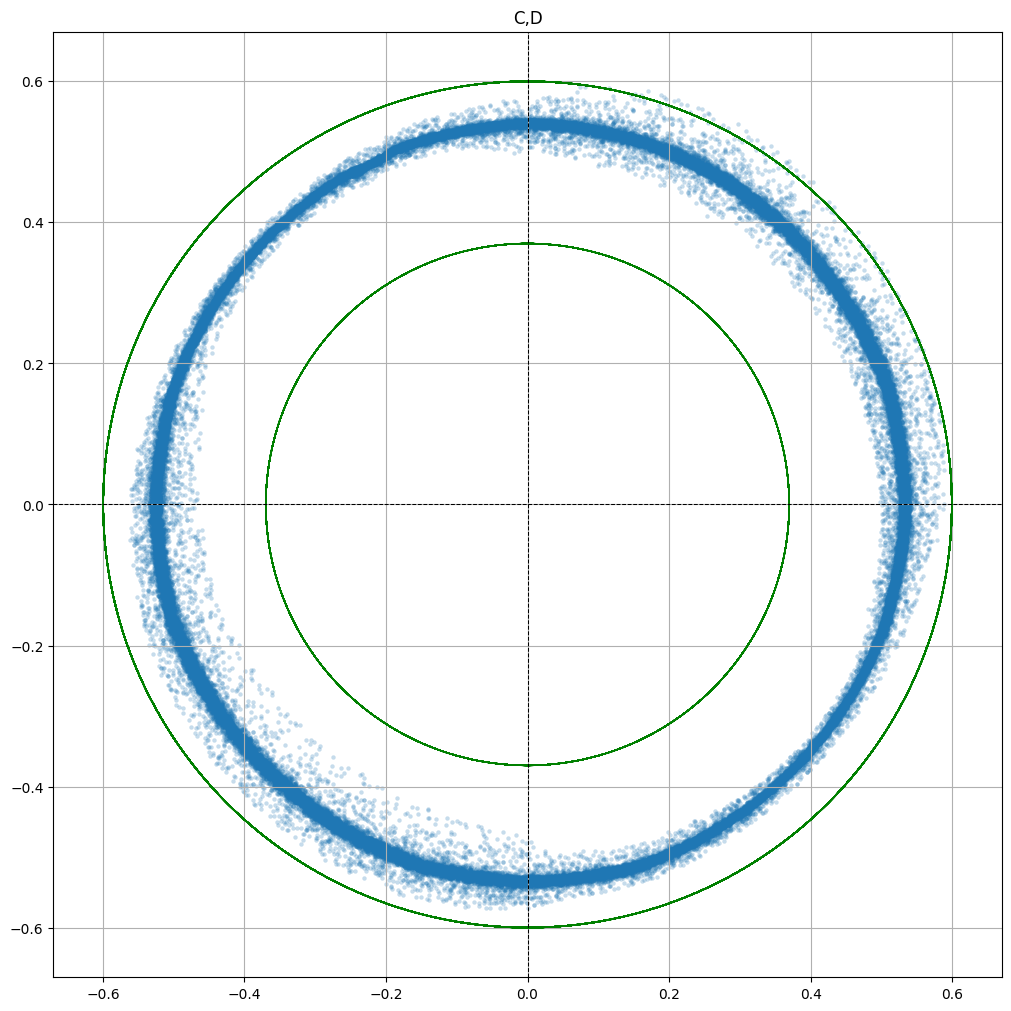

In [13]:
x = np.linspace(0,1000,10000)
y = 0.6 *np.sin(1*x+0)+0
yy = 0.6 *np.sin(1*x+np.pi/2)+0
w = 0.37 *np.sin(1*x+0)+0
ww = 0.37 *np.sin(1*x+np.pi/2)+0
fig = plt.subplots(figsize=(10,10), layout='constrained')
plt.title("C,D")
plt.plot(y,yy, lw = 0.75,color = 'g')
plt.plot(w,ww, lw = 0.75,color = 'g')
plt.scatter(c,d, linewidths= 0.1, marker=".", alpha=0.25)
plt.xlim(-0.67,0.67)
plt.ylim(-0.67,0.67)
plt.vlines(0,-0.67,0.67,color = 'k', linestyles='--',lw = 0.75)
plt.hlines(0,-0.67,0.67,color = 'k', linestyles='--',lw = 0.75)
plt.grid()
# plt.show()
plt.savefig("kolc.png")